<a href="https://colab.research.google.com/github/MatthiasYeoEeLiang/BT4012-Project/blob/main/Group18_BT4012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from matplotlib import pyplot as plt
from scipy import stats
from pyitlib import discrete_random_variable as drv
import seaborn as sns
import math

Exploratory Data Analysis

In [41]:
# url = 'https://raw.githubusercontent.com/MatthiasYeoEeLiang/BT4012-Project/Matthias/card_transdata.csv?token=GHSAT0AAAAAABZWAKOB7BTJSBUXISEG3A3KY2BJEFQ'
df = pd.read_csv("card_transdata.csv")
# print(df)
df.describe()

        distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2                             0.427715       

In [ ]:
#data type for variables
df.info()

In [ ]:
#check if there is any missing data
df.isnull().sum()

In [ ]:
#UNIVARIATE ANALYSIS
#count of fraud and non-fraud cases
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 13,
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'Fraud Pie Chart'
)

df['fraud'].value_counts().plot.pie(**kwargs)

In [ ]:
#BIVARIATE ANALYSIS
#correlation heatmap
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [ ]:
fraud_df = df.loc[df['fraud'] == 1]
fraud_df.ratio_to_median_purchase_price.describe()

In [ ]:
non_fraud_df = df.loc[df['fraud'] != 1]
non_fraud_df.ratio_to_median_purchase_price.describe()

As shown above, fraud cases tend to have a higher transation amount.

good notebook: https://www.kaggle.com/code/raphaelmarconato/credit-card-fraud-eda-and-ml

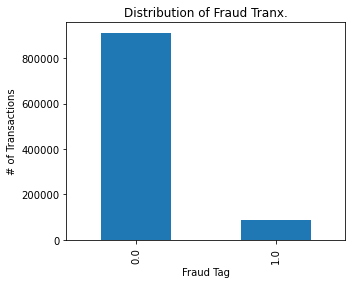

In [42]:
# count of fraud vs not fraud
plt.figure(figsize=(5, 4))
df['fraud'].value_counts().plot(kind='bar')
plt.title('Distribution of Fraud Tranx.')
plt.xlabel('Fraud Tag')
plt.ylabel('# of Transactions')
plt.show()

In [43]:
# repeat_retailer of fraud = 0 vs fraud = 1
plt.figure(figsize=(12,6))
repeat_retailer = df.loc[:, ['fraud', 'repeat_retailer']]
repeat_retailer_0 = repeat_retailer[repeat_retailer.fraud == 0]
repeat_retailer_1 = repeat_retailer[repeat_retailer.fraud == 1]



<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Transactions with fraud = 0')

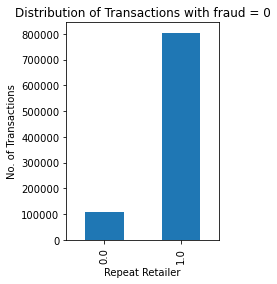

In [44]:
plt.subplot(1,2,1)
repeat_retailer_0.groupby('repeat_retailer').size().plot.bar()
plt.xlabel('Repeat Retailer')
plt.ylabel('No. of Transactions')
plt.title('Distribution of Transactions with fraud = 0')


Text(0.5, 1.0, 'Distribution of Transactions with fraud = 1')

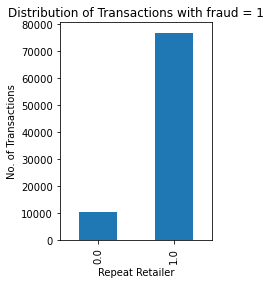

In [45]:

plt.subplot(1,2,2)
repeat_retailer_1.groupby('repeat_retailer').size().plot.bar()
plt.xlabel('Repeat Retailer')
plt.ylabel('No. of Transactions')
plt.title('Distribution of Transactions with fraud = 1')

In [46]:
# used_chip of fraud = 0 vs fraud = 1
plt.figure(figsize=(12,6))
used_chip = df.loc[:, ['fraud', 'used_chip']]
used_chip_0 = df[df.fraud == 0]
used_chip_1 = df[df.fraud == 1]


<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Transactions with fraud = 0')

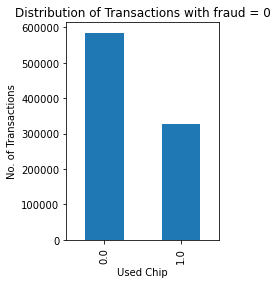

In [47]:
plt.subplot(1,2,1)
used_chip_0.groupby('used_chip').size().plot.bar()
plt.xlabel('Used Chip')
plt.ylabel('No. of Transactions')
plt.title('Distribution of Transactions with fraud = 0')


Text(0.5, 1.0, 'Distribution of Transactions with fraud = 1')

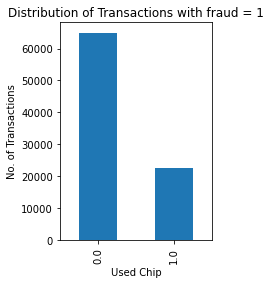

In [48]:
plt.subplot(1,2,2)
used_chip_1.groupby('used_chip').size().plot.bar()
plt.xlabel('Used Chip')
plt.ylabel('No. of Transactions')
plt.title('Distribution of Transactions with fraud = 1')

In [49]:
# used_pin_number of fraud = 0 vs fraud = 1
plt.figure(figsize=(12,6))
used_pin_number = df.loc[:, ['fraud', 'used_pin_number']]
used_pin_number_0 = df[df.fraud == 0]
used_pin_number_1 = df[df.fraud == 1]


<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Transactions with fraud = 0')

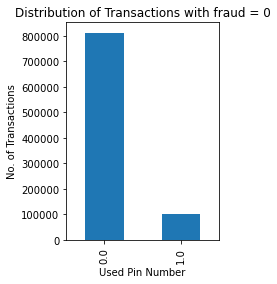

In [50]:
plt.subplot(1,2,1)
used_pin_number_0.groupby('used_pin_number').size().plot.bar()
plt.xlabel('Used Pin Number')
plt.ylabel('No. of Transactions')
plt.title('Distribution of Transactions with fraud = 0')


Text(0.5, 1.0, 'Distribution of Transactions with fraud = 1')

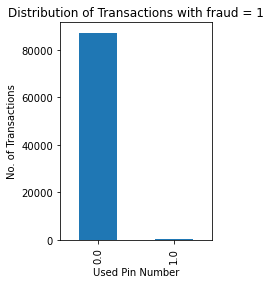

In [51]:
plt.subplot(1,2,2)
used_pin_number_1.groupby('used_pin_number').size().plot.bar()
plt.xlabel('Used Pin Number')
plt.ylabel('No. of Transactions')
plt.title('Distribution of Transactions with fraud = 1')

In [52]:
# online_order of fraud = 0 vs fraud = 1
plt.figure(figsize=(12,6))
online_order = df.loc[:, ['fraud', 'online_order']]
online_order_0 = df[df.fraud == 0]
online_order_1 = df[df.fraud == 1]


<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Transactions with fraud = 0')

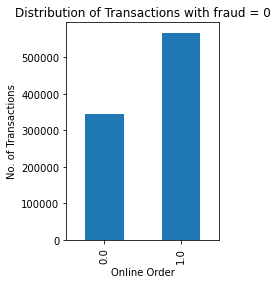

In [53]:
plt.subplot(1,2,1)
online_order_0.groupby('online_order').size().plot.bar()
plt.xlabel('Online Order')
plt.ylabel('No. of Transactions')
plt.title('Distribution of Transactions with fraud = 0')


Text(0.5, 1.0, 'Distribution of Transactions with fraud = 1')

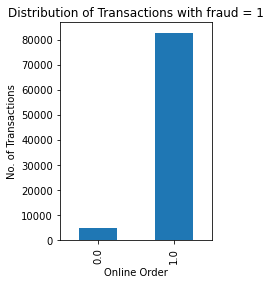

In [54]:
plt.subplot(1,2,2)
online_order_1.groupby('online_order').size().plot.bar()
plt.xlabel('Online Order')
plt.ylabel('No. of Transactions')
plt.title('Distribution of Transactions with fraud = 1')

In [55]:
# Chi square test (Categorical vs Categorical)
cat_vars = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']
p_values = []
chai_stats = []
for cat1 in cat_vars:
    for cat2 in cat_vars:
            crosstab = pd.crosstab(df[cat1], df[cat2])
            chai2, p_val, _, _ = stats.chi2_contingency(crosstab)
            p_values.append((cat1, cat2, p_val))
            chai_stats.append((cat1, cat2, chai2))

chisquare = pd.DataFrame(p_values, columns=['cat1', 'cat2', 'p-value'])
chisquare.pivot_table(index='cat1', columns='cat2', values='p-value')

cat2,fraud,online_order,repeat_retailer,used_chip,used_pin_number
cat1,,,,,
fraud,0.000000,0.000000,0.176384,0.000000,0.000000
online_order,0.000000,0.000000,0.596807,0.828524,0.773724
repeat_retailer,0.176384,0.596807,0.000000,0.179747,0.680158
used_chip,0.000000,0.828524,0.179747,0.000000,0.164619
used_pin_number,0.000000,0.773724,0.680158,0.164619,0.000000


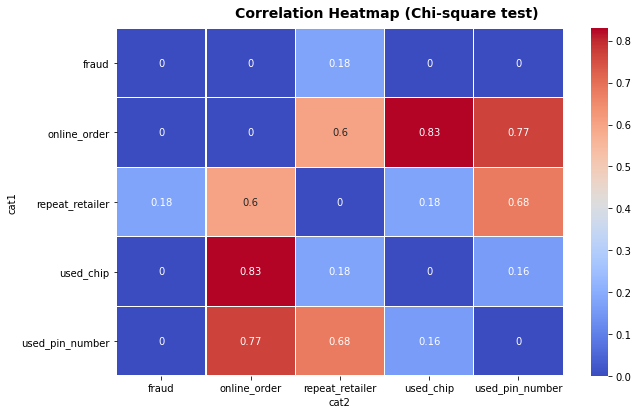

In [56]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

hm = sns.heatmap(round(chisquare.pivot_table(index='cat1', columns='cat2', values='p-value'),2), 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)

t = fig.suptitle('Correlation Heatmap (Chi-square test)', fontsize=14, fontweight='bold')

In [57]:
sns.set_theme(style="whitegrid")

g = sns.relplot(
    data=df,
    x='distance_from_home', y='distance_from_last_transaction',
    hue='fraud', size='ratio_to_median_purchase_price',
    sizes=(10, 200),
)
g.set(xscale='log', yscale='log')
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

AttributeError: module 'seaborn' has no attribute 'set_theme'

In [ ]:
df['Amount group'] = pd.cut(df.ratio_to_median_purchase_price, bins=[0,1, 300], labels=['below 1', 'above 1'])
df['hasFraud'] = df.query('fraud == 1').fraud
df['hasNoFraud'] = df.query('fraud == 0').fraud
print(df.count('hasFraud' == 1 and 'Amount group' == 'below 1'))
f, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=False)
sns.countplot(x="Amount group", hue="hasFraud", data=df, ax=axes[0])
ax = sns.countplot(x="Amount group", hue="hasNoFraud", data=df, ax=axes[1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

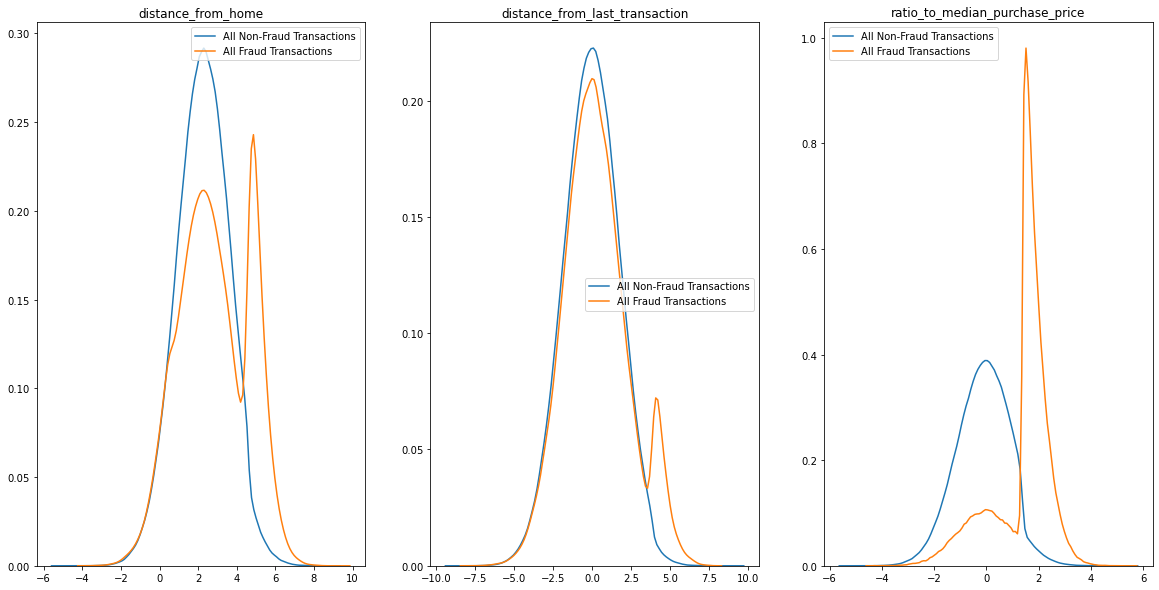

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(20, 10))
numerical_variables = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
for variable in numerical_variables:
  df[variable] = df[variable].map(lambda x: math.log(x))
for index, variable in enumerate(numerical_variables):
  sns.kdeplot(df[df['fraud']==0][variable], ax=axes[index])
  sns.kdeplot(df[df['fraud'] == 1][variable], ax=axes[index])
  axes[index].set_title(variable)
  axes[index].legend(['All Non-Fraud Transactions', 'All Fraud Transactions'])